* Name: &lt;**Farha Ferdous**&gt;

* Student ID: &lt;**24298372**&gt;


---



**Instructions**

* Create a copy of this notebook (this notebook itself is set to be immutable).


* Complete all questions below by implementing the corresponding function or class. Do not modify any existing code.

* Share your notebook and paste the link to Blackboard.
---



1. Show that any $n$-node binary tree can be converted to any other $n$-node binary tree using $O(n)$ rotations.

> **Answer**: Assuming you have two binary trees and you start at the roots of both trees, there are three possibilities: the roots are the same, or they're different but have identical left/right subtrees, or they're different and at least one subtree is different. We need to make them the same, or make one of them have the same structure as the other's subtree. This is a recursive process which continues until the trees are identical. The number of nodes in the subtrees is at most n-1 because we are dealing with binary trees, so that is why the total number of rotations needed is O(n). This is why any n-node binary tree can be converted to another n-node binary tree using O(n) rotations.

2. For a key $k$ that is not found in binary search tree $T$, prove that both the greatest key less than $k$ and the least key greater than $k$ lie on the path traced by the search for $k$.

> **Answer**: When searching for key k in a binary search tree, the search path starts from the root towards a leaf node. At each step, k is compared with the current node's key to decide to go left or right. If k isn't found, the search stops at a leaf node. Along this path, the node where the search ends is important because it either has the greatest key less than k or the least key greater than k. This is because if there were a greater or lesser key on the path, the search would have continued. So both the greatest key less than k and the least key greater than k are found on the search path of k in the binary search tree.


3. What does a splay tree look like if its items are accessed in increasing order by their keys?

> **Answer**: The tree would resemble a balanced binary tree, where the root contains the smallest key and the rightmost nodes contain the largest keys. Whenever a node is accessed, it is splayed to the root after each access operation. This moves the accessed nodes closer to the root, reshaping the tree. Eventually, the tree would resemble a linked list more where each node is splayed to the root as it is accessed, resulting in a single path from the root to the rightmost node containing the largest key.

So a splay tree accessed in increasing order would show display a trasnformation from a balanced structure to a degenerate linked list struture due to splaying.

4. Given two binary search trees (BSTs), tree1 and tree2, each represented by its root node, merge them into a single binary search tree. The merged tree should still maintain the BST property where every node's left child is less than the node's value, and the right child is greater. Optimize the merge operation to minimize the height of the resulting tree where possible. Assume each tree contains unique values, and there are no duplicate values between the two trees.

**Example**

Input:

```
tree1 =    3
          / \
         1   5

tree2 =    4
          / \
         2   6
```

Output:

```
mergedTree =    4
               / \
              3   5
             / \   \
            1   2   6
```

**Note**

> The output can have multiple valid structures as long as the final tree is a binary search tree that contains all unique values from both trees.

Can you implement the merge operation in O(n) time complexity, where n is the total number of nodes in both tree1 and tree2?

**Hints for the Candidates**

1. In-Order Traversal: Use in-order traversal to get a sorted list of values from both BSTs, as in-order traversal of a BST yields the nodes in non-decreasing order.

2. Merge Sorted Arrays: Merge the two sorted lists obtained from the BSTs into a single sorted list.

3. Construct BST: Use the merged sorted list to construct a balanced BST. This can be done by recursively choosing the middle element as the root to ensure minimal height.

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Helper function to print the tree in-order for testing purposes
def printInOrder(root):
    if not root:
        return
    printInOrder(root.left)
    print(root.val, end=' ')
    printInOrder(root.right)

def inOrderTraversal(root):
    #TODO: implement this function
    ''' performs in-order traversal of binary tree amd returns a list of node values in sorted order '''
    if not root:
      return [] # if root is none, returns an empty list
    return inOrderTraversal(root.left) + [root.val] + inOrderTraversal(root.right)  # recursively traverses the left subtree, appends the value of the current node, and then traverses the right subtree

def mergeSortedArrays(arr1, arr2):
    #TODO: implement this function
    ''' performs the merging of two sroted arrays into a single array - ensures that all elements from both arrays are included in merged while being sorted '''
    i = j = 0 # initializes pointers for both arrays
    merged = [] # initializes empty list to store the merged array
    while i < len(arr1) and j < len(arr2):  # compares elements from both arrays while there are still elements in both arrays for comparison
      if arr1[i] < arr2[j]: # if element at index i in arr1 is smaller than element at index j in arr2
        merged.append(arr1[i])  # appends the element from arr1 to the merged array
        i += 1  # increments i
      else: # otherwise
        merged.append(arr2[j])  # appends the element from arr2 to the merged array
        j += 1  # increments j
    while i < len(arr1):  # if there are remaining elements in arr1
      merged.append(arr1[i])  # appends them to merged by iteration through the rest of arr1
      i += 1
    while j < len(arr2):  # if there are remaining elements in arr2
      merged.append(arr2[j])  # appends them to merged by iterating through the rest of arr2
      j += 1
    return merged


def sortedArrayToBST(arr):
    #TODO: implement this function
    ''' constructs a balanced binary search tree (BST) from a sorted arrays of values '''
    ''' does this by selecting the middle element as root and recursively constructing balanced subtrees from left and right halves of array '''
    if not arr: # if array is empty
      return None # returns None (base case)
    mid = len(arr) // 2 # finds middle index of array
    root = TreeNode(arr[mid]) # creates root node of binary search and intiailizes it with value at middle index of sorted array (to make sure BST is balanced)
    root.left = sortedArrayToBST(arr[:mid]) # recursivelt constructs left subtree (from left half of array)
    root.right = sortedArrayToBST(arr[mid+1:])  # recursively constructs right subtree (from right half of array)
    return root # returns root of constructed BST


def mergeBSTs(tree1, tree2):
    list1 = inOrderTraversal(tree1)
    list2 = inOrderTraversal(tree2)
    mergedList = mergeSortedArrays(list1, list2)
    return sortedArrayToBST(mergedList)

In [ ]:
# Create trees for testing
# Tree 1
root1 = TreeNode(3)
root1.left = TreeNode(1)
root1.right = TreeNode(5)

# Tree 2
root2 = TreeNode(4)
root2.left = TreeNode(2)
root2.right = TreeNode(6)

# Merge the BSTs
mergedRoot = mergeBSTs(root1, root2)

# Print the merged tree in-order to verify
print("In-order traversal of merged BST:")
printInOrder(mergedRoot)

In-order traversal of merged BST:
1 2 3 4 5 6 

5. Given the root of a binary search tree, return a balanced binary search tree with the same node values. If there is more than one answer, return any of them.

  A binary search tree is balanced if the depth of the two subtrees of every node never differs by more than 1.

  **Example 1**:

  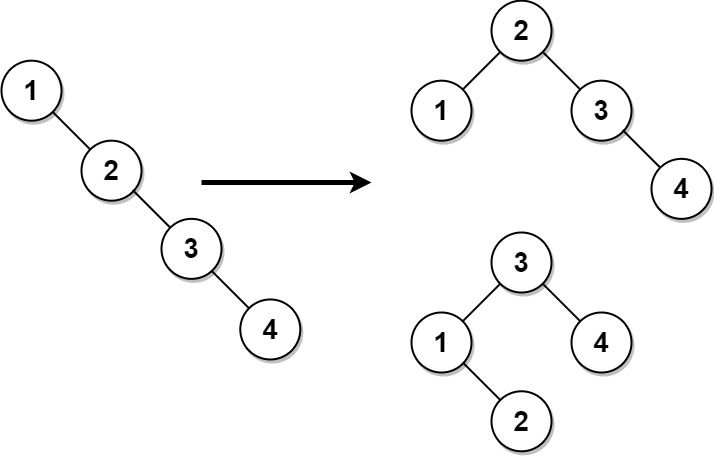

  Input: root = [1,null,2,null,3,null,4,null,null]

  Output: [2,1,3,null,null,null,4]

  Explanation: This is not the only correct answer, [3,1,4,null,2] is also correct.

  **Example 2**:

  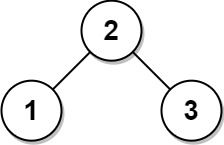

  Input: root = [2,1,3]
  
  Output: [2,1,3]


In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def inorderTraversal(root, arr=[]):
    #TODO: implement this function
    ''' performs in-order traversal of a binary tree and returns a list of node values in sorted order '''
    if not root:  # if the subtree is empty/have reached a leaf node
      return arr  # returns the list (base case)
    inorderTraversal(root.left, arr)  # traverses left subtree + appends values of nodes in left subtree to arr list
    arr.append(root.val)  # appends valye of current node to the arr list
    inorderTraversal(root.right, arr) # traverses right subtree + appends values of nodes in right subtree to arr list
    return arr


def sortedArrayToBST(nums):
    #TODO: implement this function
    ''' re-using sortedArrayToBST function from problem #4, and just changing arr to nums '''
    if not nums: # if array is empty
      return None # returns None (base case)
    mid = len(nums) // 2 # finds middle index of array
    root = TreeNode(nums[mid]) # creates root node of binary search and intiailizes it with value at middle index of sorted array (to make sure BST is balanced)
    root.left = sortedArrayToBST(nums[:mid]) # recursivelt constructs left subtree (from left half of array)
    root.right = sortedArrayToBST(nums[mid+1:])  # recursively constructs right subtree (from right half of array)
    return root # returns root of constructed BST



def balanceBST(root):
    """
    Convert an unbalanced BST into a balanced BST.

    Args:
    root: TreeNode, the root of the unbalanced BST.

    Returns:
    TreeNode: The root of the balanced BST.
    """
    # Step 1: Perform an in-order traversal to get the values in sorted order.
    sorted_values = inorderTraversal(root)

    # Step 2: Construct a balanced BST from the sorted values.
    return sortedArrayToBST(sorted_values)

In [ ]:
# Test code
def buildTree(nodes, root, i, n):
    if i < n:
        temp = TreeNode(nodes[i])
        root = temp
        root.left = buildTree(nodes, root.left, 2 * i + 1, n)
        root.right = buildTree(nodes, root.right, 2 * i + 2, n)
    return root

def isBalanced(root):
    def checkHeight(node):
        if not node:
            return 0
        leftHeight = checkHeight(node.left)
        rightHeight = checkHeight(node.right)
        if leftHeight == -1 or rightHeight == -1 or abs(leftHeight - rightHeight) > 1:
            return -1
        return 1 + max(leftHeight, rightHeight)

    return checkHeight(root) != -1

nodes = [10, 5, 15, 2, 7, None, 17]
root = None
root = buildTree(nodes, root, 0, len(nodes))
balanced_root = balanceBST(root)

print("Balanced:", isBalanced(balanced_root))

Balanced: True


6. Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).

  **Example 1**:

  Input: root = [3,9,20,null,null,15,7]

  Output: [[3],[9,20],[15,7]]

  **Example 2**:

  Input: root = [1]

  Output: [[1]]

  **Example 3**:

  Input: root = []

  Output: []

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def levelOrder(root):
    #TODO: implement this function
    ''' performs level order traversal of binary tree, returning a list of lists where each inner list represents the nodes' values at a particular tree level '''
    if not root:
      return [] # # if root is none, returns an empty list

    result = [] # initializes list to store level order traversal
    queue = [root]  # initializes list with the root node

    ''' performs level ordee traversal using queue '''
    while queue:
      level_size = len(queue) # gets no. of nodes at the current level
      level_nodes = []  # initializes a list to store the nodes at the current level

      ''' process all nodes at the current level '''
      for _ in range(level_size):
        node = queue.pop(0) # removes node from the front of the queue
        level_nodes.append(node.val)  # appends the node's value to the current level

        ''' adds the children nodes of current nodes to queue '''
        if node.left: # if there is left node
          queue.append(node.left) # adds to queue for processing in the next iteration
        if node.right:  # if there is right node
          queue.append(node.right)  # adds to queue for processing in the next iteration

      result.append(level_nodes)  # appends nodes at the current level to result list

    return result  # returns result containing the level order traversal of binary tree

In [ ]:
# Test code
def build_tree(nodes, index=0):
    """Helper function to build a tree from a list."""
    if index < len(nodes) and nodes[index] is not None:
        node = TreeNode(nodes[index])
        node.left = build_tree(nodes, 2 * index + 1)
        node.right = build_tree(nodes, 2 * index + 2)
        return node
    return None

# Example 1
root1 = build_tree([3,9,20,None,None,15,7])
print(levelOrder(root1))  # Expected: [[3],[9,20],[15,7]]

# Example 2
root2 = build_tree([1])
print(levelOrder(root2))  # Expected: [[1]]

# Example 3
root3 = build_tree([])
print(levelOrder(root3))  # Expected: []

[[3], [9, 20], [15, 7]]
[[1]]
[]
